# Convolutional Neural Networks

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 11/02/2025  | Martin | Created   | Notebook for CNN created. Completed simple CNN | 

# Content

* [Introduction](#introduction)
* [Implementing a Simple CNN](#implementing-a-simple-cnn)

# Introduction

CNN are primarily used for anything related to do with image and their analyses

* A combination of 2 components: (1) Feature Extractor (2) Trainable Classifier
* _Convolution:_ A function that is applied over the output of another matrix
* An image is a matrix of numbers and the convolution operation applies another matrix (filter) across the image using element-wise multiplication
* A new feature layer (the output of the convolution) highlights the areas of the input image that activate the filter the most
* Also introduces non-linearity, aggregation and other similar operations
* __Trainable variables in the operation would be the filter used__

💡 __IDEA:__ Common to take a pre-trained network and retrain it with a new dataset adn a new fully connected layer at the end

# Implementing a Simple CNN

Implementing a CNN based on LeNet-5 architecture. 2 CNNs composed of convolution-ReLU-max pooling operations followed by a flattening layer

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["GRPC_VERBOSITY"] = "ERROR"
os.environ["GLOG_minloglevel"] = "2"

In [24]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [25]:
# Reshape here separetes each individual pixel by adding 1 dimension
# This ensure that each pixel is 1 channel: 0-255 greyscale
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Padding the images by 2 pixels since the paper input images were 32x32
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')

# Normalise all the channel values
x_train = x_train / 255
x_test = x_test / 255

In [26]:
# Set model parameters
image_width = x_train[0].shape[0]
image_height = x_train[0].shape[1]
num_channels = 1 # indicates greyscale

# Hyperparameters
BATCH_SIZE = 100
EVAL_SIZE = 500
EPOCHS = 300
EVAL_EVERY = 5

# Set seed
seed = 98
np.random.seed(seed)
tf.random.set_seed(seed)

In [27]:
input_data = tf.keras.Input(dtype=tf.float32, shape=(image_width, image_height, num_channels), name="INPUT")

# First Conv-ReLU-MaxPool Layer
conv1 = tf.keras.layers.Conv2D(
  filters=6,
  kernel_size=5,
  padding='valid',
  activation='relu',
  name='C1'
)(input_data)

max_pool1 = tf.keras.layers.MaxPool2D(
  pool_size=2,
  strides=2,
  padding='same',
  name="S1"
)(conv1)

# Second Conv-ReLU-MaxPool Layer
conv2 = tf.keras.layers.Conv2D(
  filters=16,
  kernel_size=5,
  padding='valid',
  strides=1,
  activation='relu',
  name='C2'
)(max_pool1)

max_pool2 = tf.keras.layers.MaxPool2D(
  pool_size=2,
  strides=2,
  padding='same',
  name="S2"
)(conv2)

# Flatten Layer
flatten = tf.keras.layers.Flatten(name="Flatten")(max_pool2)

# DNN for classification
fully_connected1 = tf.keras.layers.Dense(
  units=120,
  activation='relu',
  name='FC1'
)(flatten)

fully_connected2 = tf.keras.layers.Dense(
  units=84,
  activation='relu',
  name='FC2'
)(fully_connected1)

output = tf.keras.layers.Dense(
  units=10,
  activation='softmax',
  name='OUTPUT'
)(fully_connected2)

model = tf.keras.Model(inputs=input_data, outputs=output)

W0000 00:00:1739284445.045970      18 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [28]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

In [29]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ INPUT (InputLayer)              │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C1 (Conv2D)                     │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S1 (MaxPooling2D)               │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C2 (Conv2D)                     │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S2 (MaxPooling2D)               │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC2 (Dense)                     │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUTPUT (Dense)                  │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Start the training loop
train_loss = []
train_acc = []
test_acc = []

for i in range(EPOCHS):
  rand_index = np.random.choice(len(x_train), size=BATCH_SIZE)
  rand_x = x_train[rand_index]
  rand_y = y_train[rand_index]

  history_train = model.train_on_batch(rand_x, rand_y)

  if (i+1) % EVAL_EVERY == 0:
    eval_index = np.random.choice(len(x_test), size=EVAL_SIZE)
    eval_x = x_test[eval_index]
    eval_y = y_test[eval_index]

    history_eval = model.evaluate(eval_x, eval_y)

    # Record and print results
    train_loss.append(history_train[0])
    train_acc.append(history_train[1])
    test_acc.append(history_eval[1])
    acc_and_loss = [(i+1), history_train[0], history_train[1], history_eval[1]]
    acc_and_loss = [np.round(x,2) for x in acc_and_loss]
    print('Epoch # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2539 - loss: 2.1800 
Epoch # 5. Train Loss: 2.26. Train Acc (Test Acc): 0.17 (0.27)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4771 - loss: 1.9971 
Epoch # 10. Train Loss: 2.15. Train Acc (Test Acc): 0.31 (0.52)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6924 - loss: 1.6320 
Epoch # 15. Train Loss: 1.91. Train Acc (Test Acc): 0.54 (0.68)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 1.2947 
Epoch # 20. Train Loss: 1.60. Train Acc (Test Acc): 0.64 (0.70)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8097 - loss: 0.9478 
Epoch # 25. Train Loss: 1.23. Train Acc (Test Acc): 0.71 (0.82)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7829 - loss: 0.7400 
Epoch # 30. Train Loss: 0.92. Train Acc (Test Acc): 0.80 (0.80)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8407 - loss: 0.5280 
Epoch # 35. Train Loss: 0.74. Train Acc (Test Acc): 0.80 (0.83)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

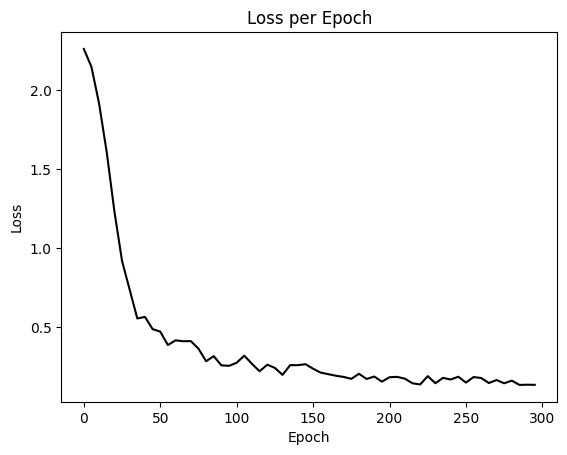

In [37]:
# Plot the accuracy
eval_indices = range(0, EPOCHS, EVAL_EVERY)
plt.plot(eval_indices, train_loss, 'k-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

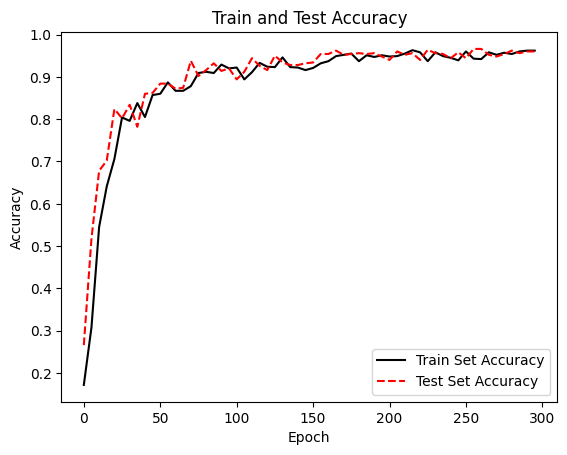

In [38]:
# Plot train and test accuracy
plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


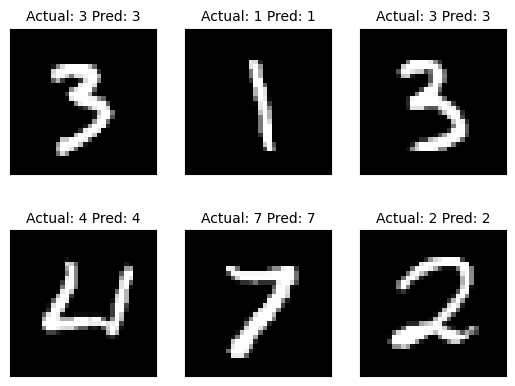

In [41]:
# Check model accuracy on 6 examples
actuals = y_test[30:36]
preds = model.predict(x_test[30:36])
predictions = np.argmax(preds, axis=1)
images = np.squeeze(x_test[30:36])

nrows = 2
ncols = 3
for i in range(6):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(np.reshape(images[i], [32, 32]), cmap='Greys_r')
  plt.title(f'Actual: {str(actuals[i])} Pred: {str(predictions[i])}', fontsize=10)

  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plt.show()

## Review

* Able to achieve good accuracy and loss for dataset
* Relatively quick to converge towards minimum
* CNN does well with image recognition - avle to create low-level features that are activated when they come across parts of the image that is important
* Creates it's own features and uses them for prediction

---

# Implementing and Advanced CNN 